In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import category_encoders as ce

In [2]:
data = pd.read_csv("./data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
8,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
9,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


Sekcija za pregled i čišćenje podataka

In [3]:
data.shape

(4810, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4810 non-null   int64  
 1   gender             4810 non-null   object 
 2   age                4810 non-null   float64
 3   hypertension       4810 non-null   int64  
 4   heart_disease      4810 non-null   int64  
 5   ever_married       4810 non-null   object 
 6   work_type          4810 non-null   object 
 7   Residence_type     4810 non-null   object 
 8   avg_glucose_level  4810 non-null   float64
 9   bmi                4616 non-null   float64
 10  smoking_status     4810 non-null   object 
 11  stroke             4810 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 451.1+ KB


In [5]:
# ideja rjesavanja missing podataka bmi: Uzeti prosjek bmi sklonih ljudi i staviti taj prosjek  
# na bmi ljudi koji su skloni a null je vrijednost bmi

prosjek_bmi_sklonih= data[data["stroke"]== 0]["bmi"].mean()
prosjek_bmi_neSklonih= data[data["stroke"]== 1]["bmi"].mean()

print(prosjek_bmi_sklonih, prosjek_bmi_neSklonih)


28.77471160370957 30.587179487179487


In [6]:
# Umetanje prosjeka u odgovarajuce redove

data.loc[(data['bmi'].isnull()) & (data['stroke'] == 0), 'bmi'] = prosjek_bmi_neSklonih
data.loc[(data['bmi'].isnull()) & (data['stroke'] == 1), 'bmi'] = prosjek_bmi_sklonih


In [7]:
data['bmi'].value_counts()

bmi
30.587179    155
28.774712     39
28.700000     39
28.400000     37
27.600000     36
            ... 
11.500000      1
57.500000      1
53.900000      1
97.600000      1
54.100000      1
Name: count, Length: 418, dtype: int64

In [8]:
data['smoking_status'].value_counts()


smoking_status
never smoked       1775
Unknown            1460
formerly smoked     834
smokes              741
Name: count, dtype: int64

In [9]:
data [ (data["smoking_status"]=="Unknown") & (data["stroke"]==0)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
234,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
236,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
237,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
238,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
252,29217,Female,65.0,1,0,Yes,Private,Rural,75.70,41.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4799,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
4802,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
4804,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
4805,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [10]:
def mapiraj_pusace(x):
    if x["smoking_status"]=="never smoked":
        return 1
    elif x["smoking_status"]=="formerly smoked":
        return 2
    elif x["smoking_status"]=="smokes":
        return 3
    elif x["smoking_status"]=="Unknown" and x["stroke"]==0:
        return 1
    else:
        return random.randint(2,3)
        
        

In [11]:
# prva ideja rjesavanja nepoznatih vrijednosti statusa konzumiranja cigareta. Za sve osobe koje su sklone staviti vrijednost random izmedju
# povremeno konzumiraju ili redovno konzumiraju, a za one koji nisu skloni random izmedju nikada i ponekad
import random
data['smoking_status'] = data.apply(mapiraj_pusace, axis=1)

#test["smoking_status"].value_counts()

In [12]:
data["ever_married"].value_counts()

ever_married
Yes    3135
No     1675
Name: count, dtype: int64

In [13]:
def mapiraj_brak(x):
    if x["ever_married"]=="Yes":
        return 1
    return 2    

In [14]:
data['ever_married'] = data.apply(mapiraj_brak, axis=1)

In [15]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,2,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.774712,1,1
2,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,3,1
3,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,1,1
4,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.000000,2,1
5,53882,Male,74.0,1,1,1,Private,Rural,70.09,27.400000,1,1
6,10434,Female,69.0,0,0,2,Private,Urban,94.39,22.800000,1,1
7,27419,Female,59.0,0,0,1,Private,Rural,76.15,28.774712,2,1
8,60491,Female,78.0,0,0,1,Private,Urban,58.57,24.200000,2,1
9,12109,Female,81.0,1,0,1,Private,Rural,80.43,29.700000,1,1


In [16]:
def mapiraj_spol(x):
    if x["gender"]=="Male":
        return 1
    return 2    

In [17]:
data['gender'] = data.apply(mapiraj_spol, axis=1)

In [18]:
data["Residence_type"].value_counts()

Residence_type
Urban    2449
Rural    2361
Name: count, dtype: int64

In [19]:
def mapiraj_stanovanje(x):
    if x["Residence_type"]=="Rural":
        return 1
    return 2
   
data['Residence_type'] = data.apply(mapiraj_stanovanje, axis=1)

In [20]:
data["work_type"].value_counts()

work_type
Private          2747
Self-employed     774
children          655
Govt_job          613
Never_worked       21
Name: count, dtype: int64

In [21]:

encoder = ce.BinaryEncoder(cols=['work_type'])
data = encoder.fit_transform(data)
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type_0,work_type_1,work_type_2,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,1,2,228.69,36.600000,2,1
1,51676,2,61.0,0,0,1,0,1,0,1,202.21,28.774712,1,1
2,60182,2,49.0,0,0,1,0,0,1,2,171.23,34.400000,3,1
3,1665,2,79.0,1,0,1,0,1,0,1,174.12,24.000000,1,1
4,56669,1,81.0,0,0,1,0,0,1,2,186.21,29.000000,2,1
5,53882,1,74.0,1,1,1,0,0,1,1,70.09,27.400000,1,1
6,10434,2,69.0,0,0,2,0,0,1,2,94.39,22.800000,1,1
7,27419,2,59.0,0,0,1,0,0,1,1,76.15,28.774712,2,1
8,60491,2,78.0,0,0,1,0,0,1,2,58.57,24.200000,2,1
9,12109,2,81.0,1,0,1,0,0,1,1,80.43,29.700000,1,1


In [22]:
data=data.drop("id", axis=1)

Sekcija istraživanja podataka

In [23]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type_0,work_type_1,work_type_2,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000
mean,1.583160,43.074703,0.095218,0.053430,1.348233,0.140541,0.288358,0.702911,1.509148,106.023339,28.906596,1.496258,0.048649
std,0.493087,22.644533,0.293547,0.224913,0.476460,0.347583,0.453045,0.457024,0.499968,45.048382,7.716550,0.754061,0.215155
min,1.000000,0.080000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,55.120000,10.300000,1.000000,0.000000
25%,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,77.292500,23.700000,1.000000,0.000000
50%,2.000000,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,91.865000,28.400000,1.000000,0.000000
75%,2.000000,61.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000,114.042500,32.700000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,267.760000,97.600000,3.000000,1.000000


In [24]:
data["stroke"].value_counts()

stroke
0    4576
1     234
Name: count, dtype: int64

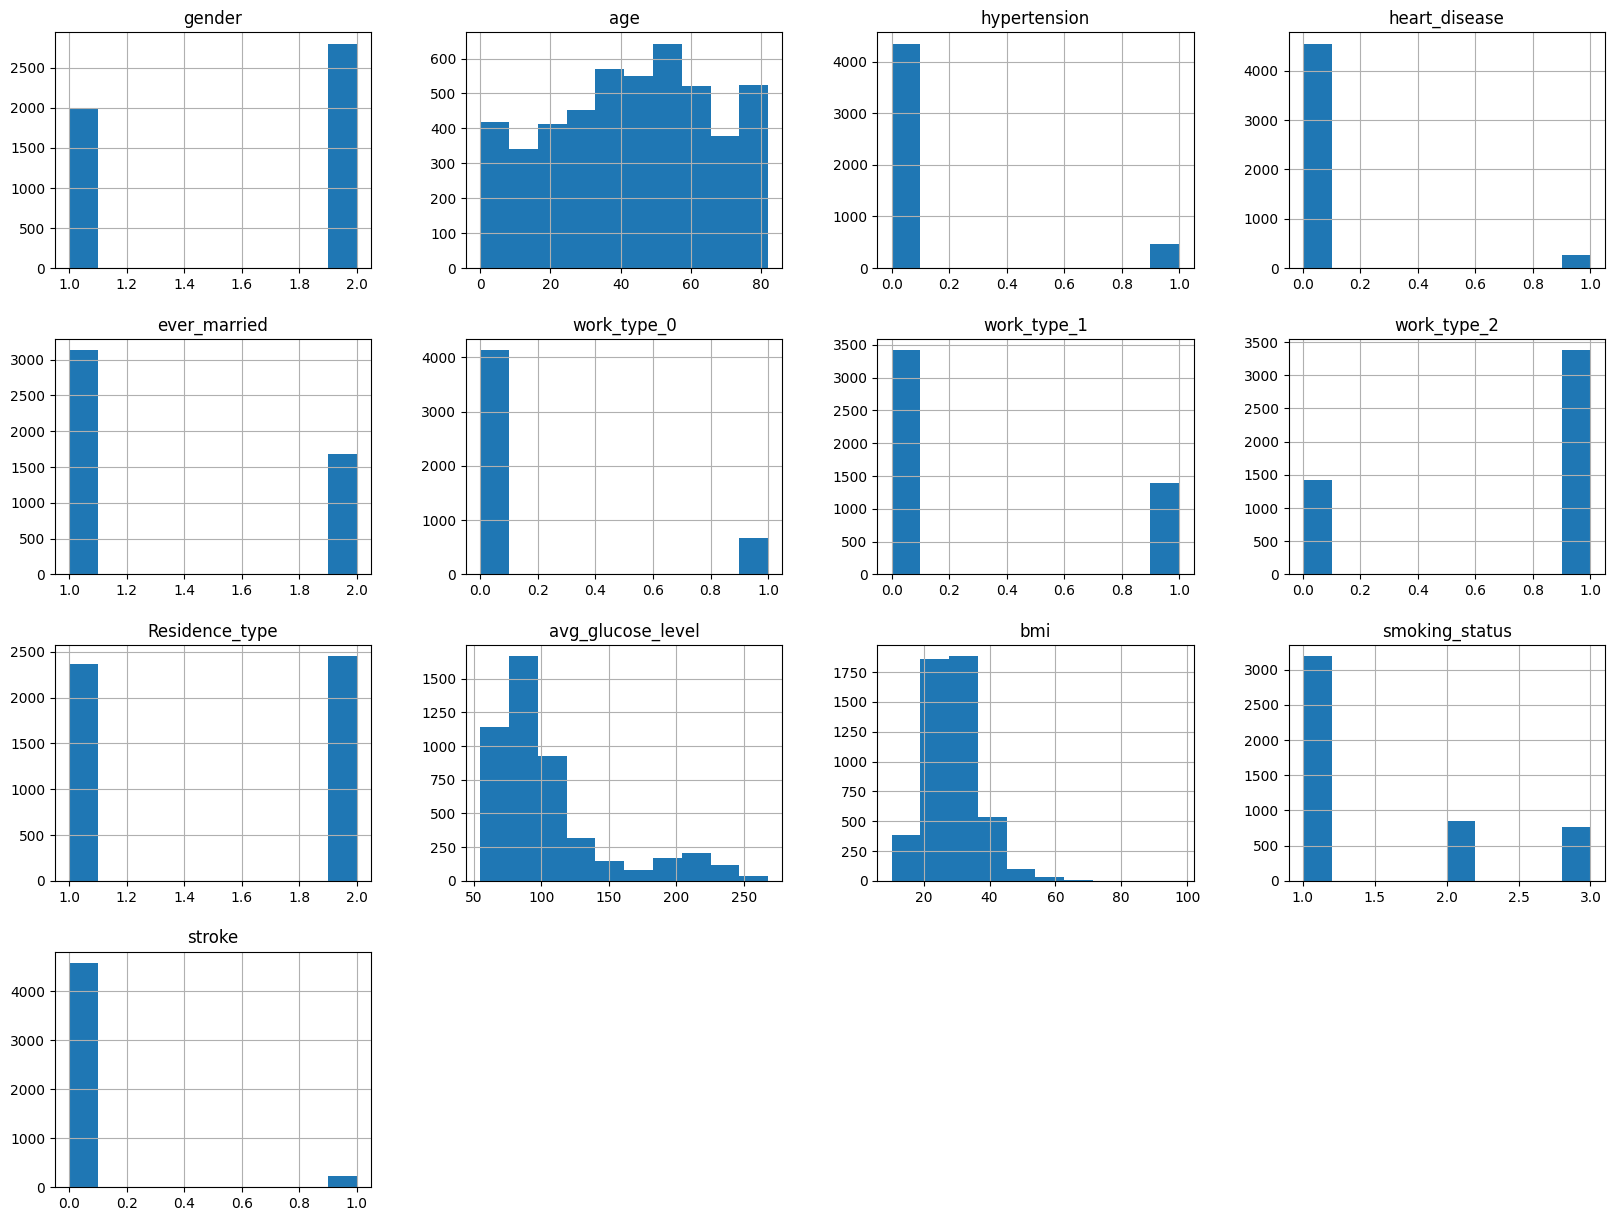

In [25]:
data.hist(bins=10, figsize=(20,15))
plt.show()

In [26]:
data.loc[(data["age"]<18) & (data["stroke"]==1)]

,gender,age,hypertension,heart_disease,ever_married,work_type_0,work_type_1,work_type_2,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
151,2,1.32,0,0,2,1,0,0,2,70.37,28.774712,3,1
230,2,14.00,0,0,2,1,0,0,1,57.93,30.900000,2,1


Izbacit ćemo djecu sa manje od 18 godina, koji nisu podobni za srcani udar jer samim tim sto su mladi ne mogu nam dati toliko korisne informacije
kakve osobine treba imati zdrava osoba

In [27]:
data=data[(data["age"]>18) | (data["stroke"] != 0)]
data[data["age"]<18]

,gender,age,hypertension,heart_disease,ever_married,work_type_0,work_type_1,work_type_2,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
151,2,1.32,0,0,2,1,0,0,2,70.37,28.774712,3,1
230,2,14.00,0,0,2,1,0,0,1,57.93,30.900000,2,1


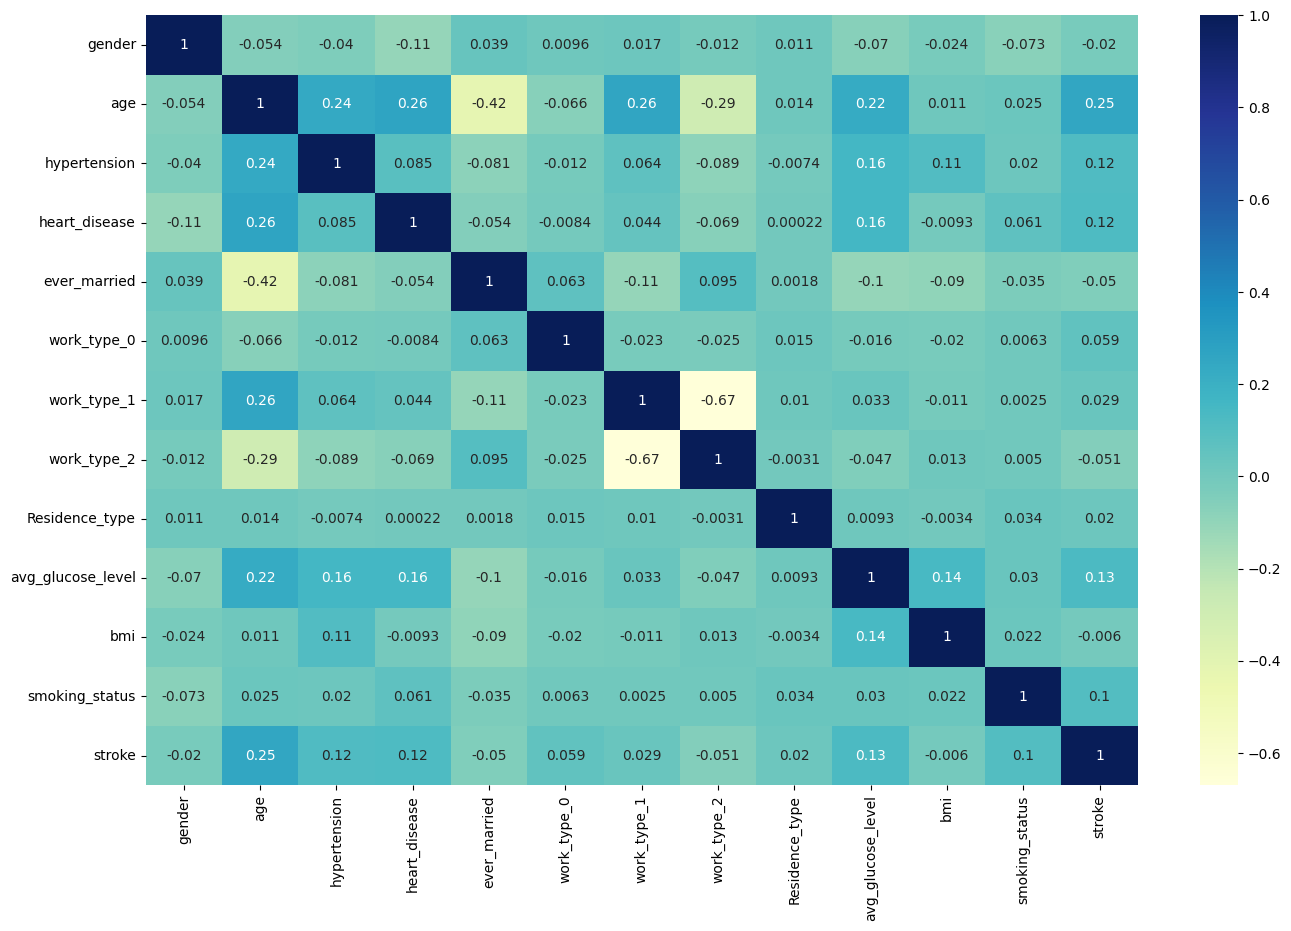

In [28]:
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='age'>

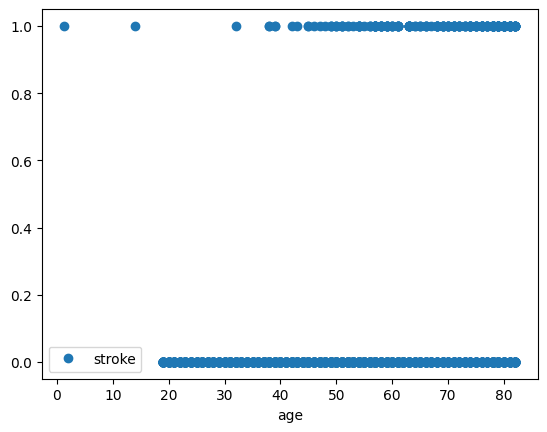

In [29]:
data.plot(x='age', y='stroke', style='o')

Na osnovu prethodnog grafika možemo vidjeti da su osobe 40+ podobnije za stroke

<Axes: xlabel='bmi'>

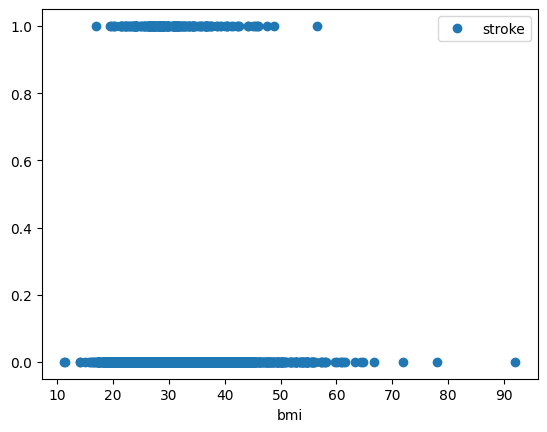

In [29]:
data.plot(x='bmi', y='stroke', style='o')

Na osnovu prethodnog grafika sam došao do pretpostavke da imamo greške u podacima, jer osobe iznad 60 bmi su pretile i podobnije su 
za srcani udar, pa cu u nastavku izvrsiti dodatnu analizu osoba sa bmi preko 60

In [30]:
bmi_gornji_test=data.loc[(data["bmi"] >= 50) & (data["stroke"] == 0)]

In [31]:
bmi_gornji_test.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type_0,work_type_1,work_type_2,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.00000,72.000000,72.000000,72.000000,72.000000,72.0
mean,1.750000,46.638889,0.194444,0.013889,1.180556,0.0,0.263889,0.87500,1.486111,119.167500,55.836111,1.500000,0.0
std,0.436051,12.502738,0.398550,0.117851,0.387349,0.0,0.443833,0.33304,0.503315,56.754176,6.692277,0.769122,0.0
min,1.000000,23.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.00000,1.000000,56.900000,50.100000,1.000000,0.0
25%,1.750000,37.750000,0.000000,0.000000,1.000000,0.0,0.000000,1.00000,1.000000,78.985000,51.900000,1.000000,0.0
50%,2.000000,47.500000,0.000000,0.000000,1.000000,0.0,0.000000,1.00000,1.000000,97.605000,54.250000,1.000000,0.0
75%,2.000000,55.250000,0.000000,0.000000,1.000000,0.0,1.000000,1.00000,2.000000,171.732500,57.225000,2.000000,0.0
max,2.000000,74.000000,1.000000,1.000000,2.000000,0.0,1.000000,1.00000,2.000000,239.190000,92.000000,3.000000,0.0


In [33]:
bmi_donji_test=data.loc[(data["bmi"] <= 15) ]
bmi_donji_test.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type_0,work_type_1,work_type_2,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,1.400000,63.400000,0.200000,0.0,1.0,0.0,0.200000,0.800000,1.800000,132.966000,13.220000,1.200000,0.0
std,0.547723,14.604794,0.447214,0.0,0.0,0.0,0.447214,0.447214,0.447214,81.243274,1.699117,0.447214,0.0
min,1.000000,40.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,60.960000,11.300000,1.000000,0.0
25%,1.000000,61.000000,0.000000,0.0,1.0,0.0,0.000000,1.000000,2.000000,79.030000,11.500000,1.000000,0.0
50%,1.000000,67.000000,0.000000,0.0,1.0,0.0,0.000000,1.000000,2.000000,82.090000,14.100000,1.000000,0.0
75%,2.000000,70.000000,0.000000,0.0,1.0,0.0,0.000000,1.000000,2.000000,214.770000,14.200000,1.000000,0.0
max,2.000000,79.000000,1.000000,0.0,1.0,0.0,1.000000,1.000000,2.000000,227.980000,15.000000,2.000000,0.0


<Axes: xlabel='bmi'>

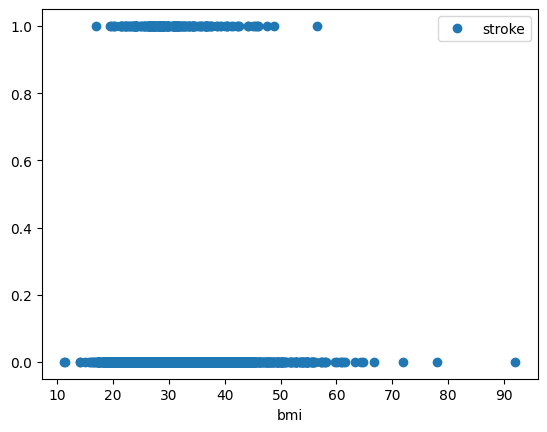

In [34]:
data.plot(x='bmi', y='stroke', style='o')

In [35]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type_0,work_type_1,work_type_2,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,1.603505,50.596220,0.116078,0.065024,1.203962,0.001016,0.346457,0.806452,1.511303,108.459878,30.455241,1.593345,0.059436
std,0.489232,17.535187,0.320359,0.246600,0.402993,0.031863,0.475901,0.395129,0.499936,47.761116,7.079988,0.789918,0.236469
min,1.000000,1.320000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,55.120000,11.300000,1.000000,0.000000
25%,1.000000,37.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,77.450000,25.700000,1.000000,0.000000
50%,2.000000,51.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,92.320000,29.400000,1.000000,0.000000
75%,2.000000,64.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,116.200000,33.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,267.760000,92.000000,3.000000,1.000000


In [36]:
data.shape

(3937, 13)

In [37]:
data["stroke"].value_counts()

stroke
0    3703
1     234
Name: count, dtype: int64

Nakon što smo očistili podatke od outliera, vrijeme je za podjelu na trening i test skupove

In [38]:
X=data.drop(columns=["stroke"])
y=data["stroke"]

print("Dimenzije X:", X.shape)
print("Dimenzije y:", y.shape)



Dimenzije X: (3937, 12)
Dimenzije y: (3937,)


Logisticka sa rfe

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


for i in range(0, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
    
    log_reg = LogisticRegression(max_iter=100000, random_state=42)
    
    
    n_features = max(2, 12 - i)  
    rfe = RFE(estimator=log_reg, n_features_to_select=n_features)
    
    # Fitting RFE
    rfe.fit(X_train_res, y_train_res)
    
    # Transformacija podataka sa odabranim značajkama
    X_train_rfe = rfe.transform(X_train_res)
    X_test_rfe = rfe.transform(X_test_scaled)
    
    # Treniranje modela na odabranim značajkama
    log_reg.fit(X_train_rfe, y_train_res)
    
    # Predikcije i evaluacija
    y_train_pred = log_reg.predict(X_train_rfe)
    y_test_pred = log_reg.predict(X_test_rfe)
    
    print(f"Rezultati za broj značajki: {n_features}")
    print("Trening rezultati")
    print(classification_report(y_train_res, y_train_pred, zero_division=0))
    
    print("Test rezultati")
    print(classification_report(y_test, y_test_pred, zero_division=0))
    


Rezultati za broj značajki: 12
Trening rezultati
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      2972
           1       0.76      0.85      0.80      2972

    accuracy                           0.79      5944
   macro avg       0.80      0.79      0.79      5944
weighted avg       0.80      0.79      0.79      5944

Test rezultati
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       731
           1       0.19      0.77      0.31        57

    accuracy                           0.75       788
   macro avg       0.58      0.76      0.58       788
weighted avg       0.92      0.75      0.81       788

Rezultati za broj značajki: 11
Trening rezultati
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      2972
           1       0.76      0.85      0.80      2972

    accuracy                           0.79      5944
   macro avg   

Ostavit ćemo 6 featuresa jer nam daje najbolji rezultat

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

log_reg = LogisticRegression(max_iter=100000, random_state=42)


n_features = 6  
rfe = RFE(estimator=log_reg, n_features_to_select=n_features)

# Fitting RFE
rfe.fit(X_train_res, y_train_res)

# Transformacija podataka sa odabranim značajkama
X_train_rfe = rfe.transform(X_train_res)
X_test_rfe = rfe.transform(X_test_scaled)

# Treniranje modela na odabranim značajkama
log_reg.fit(X_train_rfe, y_train_res)

# Predikcije i evaluacija
y_train_pred = log_reg.predict(X_train_rfe)
y_test_pred = log_reg.predict(X_test_rfe)

print(f"Rezultati za broj značajki: {n_features}")
print("Trening rezultati")
print(classification_report(y_train_res, y_train_pred, zero_division=0))

print("Test rezultati")
print(classification_report(y_test, y_test_pred, zero_division=0))

Rezultati za broj značajki: 6
Trening rezultati
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      2972
           1       0.76      0.85      0.80      2972

    accuracy                           0.79      5944
   macro avg       0.79      0.79      0.79      5944
weighted avg       0.79      0.79      0.79      5944

Test rezultati
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       731
           1       0.19      0.79      0.31        57

    accuracy                           0.74       788
   macro avg       0.59      0.77      0.58       788
weighted avg       0.92      0.74      0.80       788



In [ ]:
Logistička regresija sa stratifiedkfold

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_splits = 10
models = []
accuracies = []


skf = StratifiedKFold(n_splits=n_splits)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
    
    model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1)),
    ('log_reg', LogisticRegression(class_weight='balanced', max_iter=100000))
])
    model.fit(X_train_res, y_train_res)
    
    y_test_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies.append(accuracy)
    
    # Dodavanje treniranog modela u listu
    models.append(('log_reg_' + str(len(models)), model))

    # Ispis rezultata za svaki fold
    print(f"Fold {len(models)} - Accuracy: {accuracy}")
    print(classification_report(y_test, y_test_pred))

# Prosječna tačnost
print(f"Prosječna tačnost: {np.mean(accuracies)}")

# Kreiranje ensembling modela
ensemble_model = VotingClassifier(estimators=models, voting='soft')

# Skaliranje cijelog skupa podataka
X_scaled = scaler.fit_transform(X)

# Treniranje ensembling modela na svim podacima
ensemble_model.fit(X_scaled, y)

# Predikcije i evaluacija na cijelom skupu
y_pred = ensemble_model.predict(X_scaled)
print("Ensembling Model Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

Fold 1 - Accuracy: 0.7461928934010152
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       370
           1       0.17      0.79      0.28        24

    accuracy                           0.75       394
   macro avg       0.57      0.77      0.56       394
weighted avg       0.93      0.75      0.81       394

Fold 2 - Accuracy: 0.751269035532995
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       370
           1       0.16      0.75      0.27        24

    accuracy                           0.75       394
   macro avg       0.57      0.75      0.56       394
weighted avg       0.93      0.75      0.81       394

Fold 3 - Accuracy: 0.7208121827411168
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       370
           1       0.15      0.79      0.26        24

    accuracy                           0.72       394
   macro avg   

Logistička regresija sa upotrebom SMOTE


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train_std_scaler = StandardScaler()

X_train_std = train_std_scaler.fit_transform(X_train)
X_test_std = train_std_scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_std, y_train)

pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1)),
    ('log_reg', LogisticRegression(class_weight='balanced', max_iter=100000))
])

pipeline.fit(X_train_res, y_train_res)

y_train_pred=pipeline.predict(X_train_res)

print(classification_report(y_train_res, y_train_pred))

# Predviđanje na testnom setu
y_pred = pipeline.predict(X_test_std)

# Evaluacija modela
accuracy = accuracy_score(y_test, y_pred)
print(f'Tačnost modela: {accuracy:.2f}')

# Prikazivanje detaljnih rezultata
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.73      0.78      2964
           1       0.76      0.85      0.80      2964

    accuracy                           0.79      5928
   macro avg       0.79      0.79      0.79      5928
weighted avg       0.79      0.79      0.79      5928

Tačnost modela: 0.75
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       739
           1       0.17      0.78      0.28        49

    accuracy                           0.75       788
   macro avg       0.57      0.76      0.56       788
weighted avg       0.93      0.75      0.81       788



SVM sa sintetickim podacima

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Dimenzije X train:", X_train.shape)
print("Dimenzije y train:", y_train.shape)

print("Dimenzije X test:", X_test.shape)
print("Dimenzije y test:", y_test.shape)

train_std_scaler = StandardScaler()

X_train_std = train_std_scaler.fit_transform(X_train)
X_test_std = train_std_scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_std, y_train)

model =  SVC(kernel='linear', C=1/10, gamma='scale')
model.fit(X_train_res, y_train_res)

y_train_pred = model.predict(X_train_res)
print("Trening rezultati")
print(classification_report(y_train_res, y_train_pred, zero_division=0))

# Predikcija na test setu
y_test_pred = model.predict(X_test_std)
print("Test rezultati")
print(classification_report(y_test, y_test_pred, zero_division=0))

Dimenzije X train: (3149, 12)
Dimenzije y train: (3149,)
Dimenzije X test: (788, 12)
Dimenzije y test: (788,)
Trening rezultati
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      2964
           1       0.75      0.87      0.81      2964

    accuracy                           0.79      5928
   macro avg       0.80      0.79      0.79      5928
weighted avg       0.80      0.79      0.79      5928

Test rezultati
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       739
           1       0.16      0.80      0.27        49

    accuracy                           0.73       788
   macro avg       0.57      0.76      0.55       788
weighted avg       0.93      0.73      0.80       788



SVM bez sintetickih podataka

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Dimenzije X train:", X_train.shape)
print("Dimenzije y train:", y_train.shape)

print("Dimenzije X test:", X_test.shape)
print("Dimenzije y test:", y_test.shape)

train_std_scaler = StandardScaler()

X_train_std = train_std_scaler.fit_transform(X_train)
X_test_std = train_std_scaler.transform(X_test)


model =  SVC(kernel='linear', C=1/10, gamma='scale', class_weight="balanced")
model.fit(X_train_std, y_train)

y_train_pred = model.predict(X_train_std)
print("Trening rezultati")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Predikcija na test setu
y_test_pred = model.predict(X_test_std)
print("Test rezultati")
print(classification_report(y_test, y_test_pred, zero_division=0))

Dimenzije X train: (3149, 12)
Dimenzije y train: (3149,)
Dimenzije X test: (788, 12)
Dimenzije y test: (788,)
Trening rezultati
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      2964
           1       0.16      0.85      0.26       185

    accuracy                           0.72      3149
   macro avg       0.57      0.78      0.54      3149
weighted avg       0.94      0.72      0.79      3149

Test rezultati
              precision    recall  f1-score   support

           0       0.98      0.71      0.82       739
           1       0.16      0.82      0.26        49

    accuracy                           0.71       788
   macro avg       0.57      0.76      0.54       788
weighted avg       0.93      0.71      0.79       788



In [50]:
def evaluate_model(path: str, model, upotrebljen_rfe=False):
    if upotrebljen_rfe :
        X_train_rfe = rfe.transform(X_train_res)
        X_test_rfe = rfe.transform(X_test_scaled)

    data=pd.read_csv(path)
    data=data.drop("id", axis=1)
    data.dropna(inplace=True)
    data['smoking_status'] = data.apply(mapiraj_pusace, axis=1)
    data['ever_married'] = data.apply(mapiraj_brak, axis=1)
    data['gender'] = data.apply(mapiraj_spol, axis=1)    
    data['Residence_type'] = data.apply(mapiraj_stanovanje, axis=1)
    encoder = ce.BinaryEncoder(cols=['work_type'])
    data = encoder.fit_transform(data)
    data.head(10)
    
    X=data.drop(columns=["stroke"])
    y=data["stroke"]
    X_test_std = train_std_scaler.transform(X)
    if upotrebljen_rfe :
        X_rfe = rfe.transform(X_test_std)
        y_pred=model.predict(X_rfe)
    else:    
        y_pred=model.predict(X_test_std)
    print(classification_report(y, y_pred))
    
    